<div style="text-align: center">
<img src="https://www.unbosque.edu.co/sites/default/files/logo.png" width="400px"/></div>

## Programa de Matemáticas

**Maestría en Estadística Aplicada y Ciencia de Datos**

**Machine Learning: Proyecto Final**

**Modelo de Predicción de Hongos Comestibles y Venenosos**


Nombres: Daniela Lucia Ramos Betín, Diego Nicolás Ávila Moreno (davilam@unbosque.edu.co)

In [1]:
#Instalar para correcto funcionamiento

#!pip install pycaret
#!pip install catboost
#!pip install ppscore
#!pip install shap
#!pip install missingno

# 1. Resumen Ejecutivo

El conjunto de datos "Hongos Venenosos" de ICS UCI es una *colección de datos sobre diferentes características de hongos venenosos y comestibles*. El objetivo de este conjunto de datos es clasificar los hongos en venenosos o comestibles en función de estas características. En este caso, el conjunto de datos contiene un total de 8124 registros y 23 variables. Los atributos incluyen características como la forma del sombrero del hongo, la superficie del sombrero, la textura de la lámina, el color de la espora, etc. El target de clase es la clasificación del hongo como venenoso o comestible.

Para este proyecto, el conjunto de datos fue seleccionado por ser adecuado para la creación de modelos de clasificación en Python, con el objetivo de *predecir si un hongo es venenoso o comestible en función de sus características*, para eso se utilizaran algoritmos de clasificación supervisada, como Regresión Logística, Árboles de Decisión, Random Forest, etc.

Antes de construir el modelo, realizaremos tareas de preprocesamiento de datos, como la eliminación de características irrelevantes, la transformación de variables categóricas en variables numéricas, la normalización de datos, etc.
Es importante tener en cuenta que, aunque el conjunto de datos está limpio, es adecuado realizar cierta exploración y análisis para identificar patrones y relaciones entre las diferentes características y la clase de hongo. 

Tambien, durante el proceso se realiza validacion cruzada, analisis de correlaciones e implementacion de la libreria pycaret.

Como resultados se obtienen 3 modelo de excelentes metricas de clasificación, testeado en 3 clases de hongos no pertenecientes al dataset como lo son <i>tricholoma equestre</i>, <i>amanita bisporigera</i>, y <i>pleurotus ostreatus</i>.



# 2. Descripción del Problema

Desde el desarrollo industrial alimenticio, la obtención de recursos que asegure obtener alimentos nutritivos e igualmente seguros para la población ha sido un aspecto de gran relevancia. De manera más puntual la industria fungicultora ha desarrollado desde hace varios siglos una pocisión importante en este aspecto. Pero la naturaleza de los hongos es muy variada, por lo que la existencia de frutos nutritivos como algunos de naturaleza más nociva ha llevado a micologos, biologos, industriales y demás profesionales a la generación de métodos de detección alrededor del hongo que permitan detectar su naturaleza.

La detección de hongos comestibles o venenosos no solamente es una manera de seleccionar aquellas especies que pueden ser usadas como materia prima de industrias alimenticias, sino tambien como un referente para investigación científica que permita encontrar en las caracteristicas químicas del hongo posibles soluciones al entorno de la salud y la medicina como lo fue alguna vez la creación de la penicilina.

## 2.1 Problema de Negocio

Desde el punto de vista industrial, se desea detectar la naturaleza de ciertos hongos basado en ciertas propiedades físicas de tal amnera que se puedan categorizarce entre comestibles y venenosos.

## 2.2 Aproximación Desde la Analítica de Datos

El modelo a desarrollar permitiría a investiadores de campo como micólogos o biologos a detectar rapidamente según las propiedades físicas del hongo encontrado si este es comestible o por el contrario venenoso. En ortros terminos, el modelo clasificará la naturaleza del hongo con base a su conformación anatómica.

## 2.3 Origen de los Datos

Es importante aclarar que desde el contexto laboral de los diseñadores de este modelo, es dificil extraer información desde sus lugares de trabajo. Por esta razón se buscaron en diversas fuentes de datos que permitan desarrollar este proyecto final de clase. En este caso decidimos tomar una base de datos que contiene la información de ciertos registros de hongos encontrados a lo largo de los Estados Unidos y que tiene como variables diversos descriptivos de la antomía de los hongos encontrados.

Aunque esta base hace parte de un registro que lleva varios años sin actualizar, sabemos que la naturaleza de los hongos tiende a ser la misma sin importar el tiempo. Por esta razón esta base aún puede ser una fuente de datos importante si se quiere aplicar este modelo en la vida real y que sea posible implementar dicho modelo a procesos de predicción de nuevas especies que se encuentren a futuro.

## 2.4 Métricas de Desempeño

El modelo se medirá a partir de una sola métrica en especifico que es la exactitud lograda por cada modelo diseñado. Esta deberá superar el 80% con base a la data de prueba que se aplique.

En el caso de las métricas del negocio, se espera que el modelo logre generar la predicción adecuada del tipo de hongo encontrado, teniendo en cuenta la métrica de exactitud establecida en el diseño del modelo.

En ese orden de ideas, se espera que el modelo tenga una exactitud del 80% o mayor para predecir si un hongo encontrado puede ser comestible o venenoso.

# 3. Datos

In [2]:
#Librerias a importar para el proyecto 
import pandas as pd
from sklearn.impute import SimpleImputer
import missingno as msno
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve,RocCurveDisplay,roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import neighbors
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
import catboost
from sklearn.compose import ColumnTransformer
import pycaret
import ppscore as pps
from sklearn.tree import DecisionTreeClassifier, plot_tree
from pycaret.classification import *

import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3.1 Datos Originales

La data se caracteriza por tener un total de **8124 registros** 
y **23 columnas** que representan diversas características anatómicas de los hongos encontrados. Las variables de esta base son:

- **POI:** si el hongo es venenoso (P) o comestible (e)
- **CAP_SHAPE:** forma del hongo, más exactamente la forma del píleo o sombrero. Pueden ser bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
- **CAP_SURFACE:** forma de la superficie del píleo o sombreo. Puese ser fibrous=f, grooves=g, scaly=y, smooth=s
- **CAP_COLOR:** color del píleo o sombrero. Puede ser brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
- **BRUISES:** indica si el hongo presenta mancha similares a morados como golpes. Puede ser sí (t) o no (f)
- **ODOR:**si el hongo presenta algú tipo de olor. Puede ser almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
- **G_ATTA:** indica la configuración de las laminas del hongo. Puede ser attached=a, descending=d, free=f, notched=n
- **G_SPA:** espacio entre las laminas del hongo. Puede ser close=c,crowded=w,distant=d
- **G_SIZE:** tamaño de las laminas. Puede ser broad=b, narrow=n
- **G_COLOR:** color de las laminas. Puede ser black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
- **S_SHAPE:** forma del tallo. Puede ser enlarging=e,tapering=t
- **S_ROOT:** raiz del hongo. Puede ser bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
- **S_SURF_AB:** tipo de superficie del tallo por encima del anillo del hongo. Puede ser fibrous=f, scaly=y, silky=k, smooth=s
- **S_SUFR_BE:** tipo de superficie del tallo por debajo del anillo del hongo. Puede ser fibrous=f, scaly=y, silky=k, smooth=s
- **S_COLOR_AB:** color del tallo por encima del anillo del hongo. Puede ser brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- **S_COLOR_BE:** color del tallo por debajo del anillo del hongo. Puede ser brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- **VEIL_T:** tipo de velo del hongo. Puede ser partial=p, universal=u
- **VEIL_C:** color del velo. Puede ser brown=n, orange=o, white=w, yellow=y
- **RING_N:** número de anillos. Puede ser none=n, one=o, two=t
- **RING_T:** tipo de anillo. Puede ser cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
- **SPORE:** color de la espora del hongo. Puede ser black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
- **POP:** tipo de población del hongo al momento de encontrarlo. Puede ser abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
- **HAB:** habitat donde fue encontrado en holgo: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

Como parte del ejercicio de contextualización de la data que alimentará el modelo, dejamos una guía de la anatomía de los hongos.

<img src="https://cdn.shopify.com/s/files/1/0031/4756/3081/files/Anatomy3.jpg?v=1596220270" width="400px"/>
*Img 1. Anatómia de un Hongo.*

Todas las variables como se pueden ver desde su descripción son catgóricas. La variable objetivo del modelo será la variable 'POI'. Desde el proceso de preparación de los datos se detectó que existia una variable con datos en vacio, más exactamente 'S_ROOT', la cual indica la naturaleza de la raíz del hongo.

El formato del archivo es un txt de 363 Kb. y se trata de una unica base. Para su acceso, dicha base es pública y puede encontrarse desde este [enlace](https://archive.ics.uci.edu/ml/datasets/mushroom). Pero aún siendo pública puede tomarse como base para el diseño de un modelo clasificador como el que se diseñó pues la muestra se trata de un trabajo realmente realizado en Estados Unidos con el objetivo de clasificar diversas especies de hongos.

## 3.2 Datasets

Para el proceso de entrenamiento y validación de datos la base se particionó en una proporción 70% y 30% respectivamente. Dentro del desarrollo de diseño de los distintos modelos a evaluar se realizó el proceso de validación cruzada, la cual se aplico sobre ese 70% de datos de entrenamiento. Esto se hizo con el objetivo de mantener un grupo de datos que permitiera hacer el proceso de validación del modelo para identificar posibles sobreajustes.

## 3.3 Descriptiva
**Importante: como parte del entregable de este proyecto enviamos la base de datos del modelo.**

El proceso de descriptivos hizo parte del diseño del modelo. Esto se debe a que dentro del proceso de desarrollo de modelos de machine learning es importante identificar que variables o parametros pueden estár muy correlacionados. Las correlaciones altas pueden generar ruido en el modelo a diseñar.

Al tener información categorizada es posible ver correlaciones de los parametros de las bases por médio de ténicas gráficas. Al ser la variable 'POI' (comestible o venenosos) la variable objetivo, diseñamos diversos descriptivos que nos permitieran ver el coportamiento de esta variable con las demás variables anatómicas y al mismo tiempo ver si entre variables existian comportamientos similares que pueden dar indicios de correlación. Desde este analisis fue que se realizó el proceso de selección de variables a utilizar para el entrenamiento del modelo.

IMPORTANTE: los procesos de diseño de descriptivos se pueden ver desde el archivo de código adjunto a la entrega del proyecto. De todas maneras se dejan explicitos dentro de este documento lós códigos que contienen los datos más importantes de esta actividad.

In [4]:
## Muestra primeras 6 filas de la base
data = pd.read_table('/content/drive/MyDrive/Proyecto ML UElBosque/Bases/agaricus-lepiota.data',delimiter=',')
##data = pd.read_table('H:/Mi unidad/Maestría/Clases/6. Machine Learning/Practicas de Machine Learning/Proyecto ML UElBosque/Bases/agaricus-lepiota.data',delimiter=',')
data.head(6)

,POI,CAP_SHAPE,CAP_SURFACE,CAP_COLOR,BRUISES,ODOR,G_ATTA,G_SPA,G_SIZE,G_COLOR,...,S_SURF_BE,S_COLOR_AB,S_COLOR_BE,VEIL_T,VEIL_C,RING_N,RING_T,SPORE,POP,HAB
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [5]:
data_raw=data.copy()

In [6]:
data.dtypes.value_counts()

object    23
dtype: int64

In [7]:
#Vemos la cantidad de casos por clase (balance)
data.POI.value_counts()

e    4208
p    3916
Name: POI, dtype: int64

In [8]:
## Número de registros
len(data)

8124

Como se señaló previamente, se encontraron datos en blanco en la variable respectiva al tipo de raíz del hongo. A esta variable se le hizo el proceso de imputación por medio del dato más frecuente, pero es importante aclarar que dicha variable finalmente no se usó pues desde el proceso de descriptivos no se encontró un patrón o comportamiento sobre la naturaleza del hongo que permitiera decir que el tipo de raíz puede ser un buen predictor. La gráfica resultante del siguiente código muestra la data ya imputada sin valores en blanco.

<Axes: >

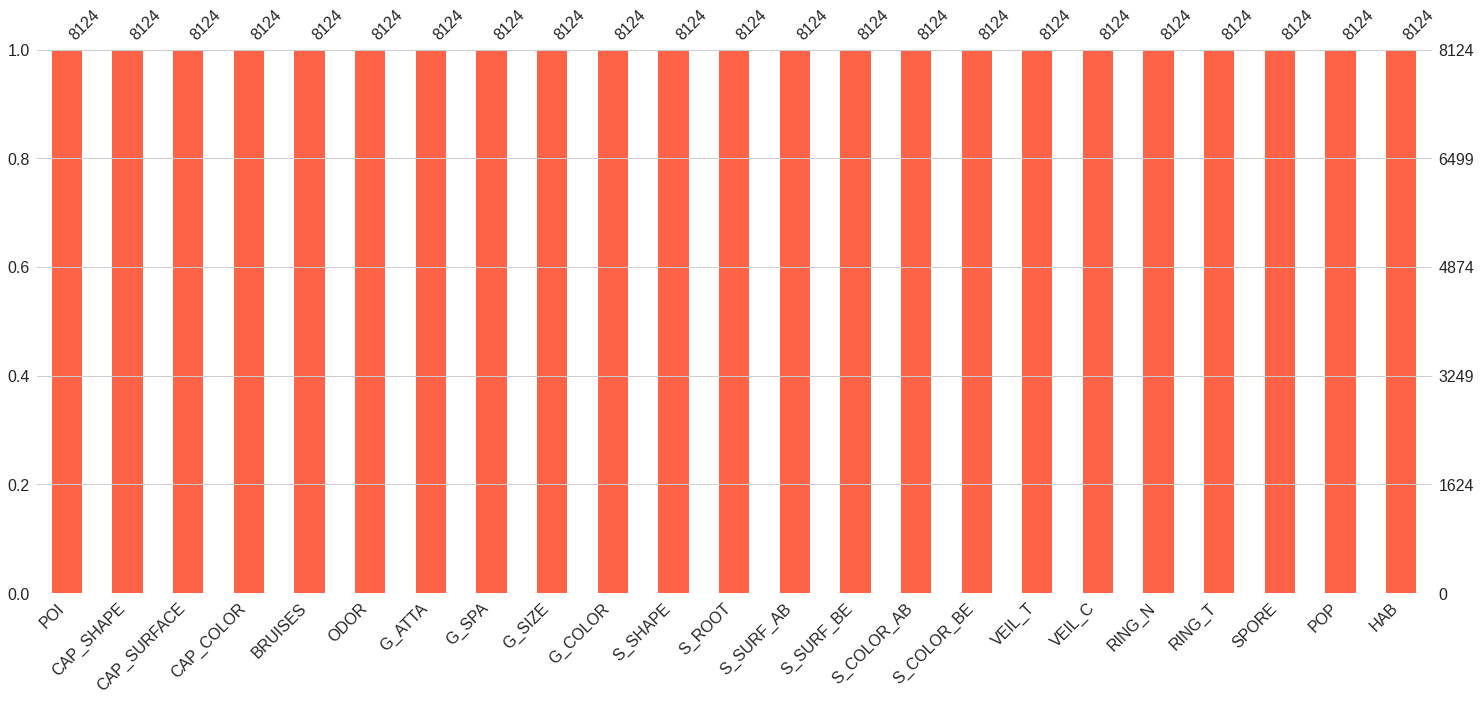

In [9]:
## imputación por medio de dato más frecuente.

x = data.columns

imp = SimpleImputer(strategy="most_frequent")
table = imp.fit_transform(data)
data2 = pd.DataFrame(table,columns=x)

msno.bar(data2,color="tomato")

Al realizar los descriptivos con respecto a la variable POI (comestible o venenoso), se realizo un proceso de despivoteo y conteo de las variables anatómicas con respecto a esta variable. Dicha base solo tiene como objetivo servir como fuente de alimentación para las gráficas, más no como entrenador del modelo.

In [10]:
data3 = data2.reset_index()
data3 = data3.melt(id_vars = ['index','POI'], var_name = 'var', value_name = 'value')
data3 = data3.groupby(['var','value','POI'])['index'].count()
data3 = data3.reset_index()
data3 = data3.rename(columns = {'index' : 'can'})
data3

,var,value,POI,can
0,BRUISES,f,e,1456
1,BRUISES,f,p,3292
2,BRUISES,t,e,2752
3,BRUISES,t,p,624
4,CAP_COLOR,b,e,48
...,...,...,...,...
182,VEIL_C,w,e,4016
183,VEIL_C,w,p,3908
184,VEIL_C,y,p,8
185,VEIL_T,p,e,4208


Con esta base podemos pasar a diseñar las gráficas descriptivas con respecto a la naturaleza del hongo. A continuación los datos más relevantes encontrados.

**Presencia de manchas en el hongo (Bruises)**: los hongos venenosos tienen una mayor frecuencia de presencia de manchas. Algo que es distinto en el caso de los hongos comestibles donde la frecuencia de manchas es más baja.

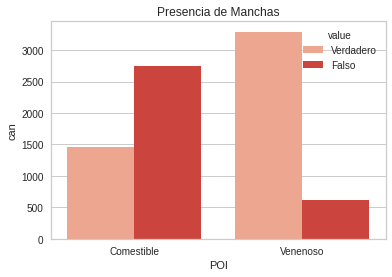

In [11]:
a = data3.loc[data3['var'] == 'BRUISES']
a = a.replace({'value':['f','t'],'POI':['e','p']},
              {'value':['Verdadero','Falso'],'POI':['Comestible','Venenoso']})

plot = sns.barplot(x = 'POI', y = 'can', hue = 'value', data = a,palette='Reds').set(title='Presencia de Manchas')

**Color de las laminas del hongo (G_COLOR)**: aunque existe variación de colores para ambos casos, en el caso de los hongos venenosos es más frecuente que tengan las laminas de color beige. En el caso de los hongos comestibles, este comportaminto es diferente, ya que no se ven registros de hongos que tengan laminas de color beige. De hecho tienden a ser más comunes colores negro, naranja y blanco.

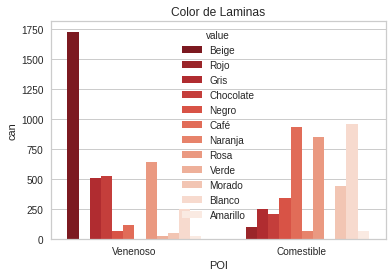

In [12]:
b = data3.loc[data3['var'] == 'G_COLOR']
b = b.replace({'value':['k','n','b','h','g','r','o','p','u','e','w','y'],'POI':['e','p']},
              {'value':['Negro','Café','Beige','Chocolate','Gris','Verde','Naranja','Rosa','Morado','Rojo','Blanco','Amarillo'],'POI':['Comestible','Venenoso']})

plot = sns.barplot(x = 'POI', y = 'can', hue = 'value', data = b,palette='Reds_r').set(title='Color de Laminas')

**Tamaño de las laminas (G_SIZE)**: los hongos comestibles presentan laminas anchas. En el caso de las venenosas las laminas pueden ser tanto anchas como estrechas.

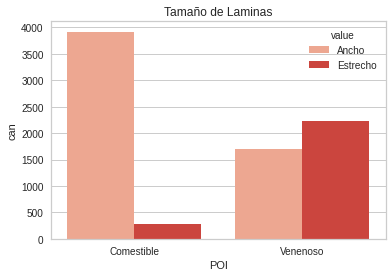

In [13]:
c = data3.loc[data3['var'] == 'G_SIZE']
c = c.replace({'value':['b','n'],'POI':['e','p']},
              {'value':['Ancho','Estrecho'],'POI':['Comestible','Venenoso']})

plot = sns.barplot(x = 'POI', y = 'can', hue = 'value', data = c,palette='Reds').set(title='Tamaño de Laminas')

**Olor del hongo (ODOR)**: los hongos comestibles no frecuentan olores. En caso de los hongos venenosos estos pueden presentar olores desagradables la mayoria de veces e incluso otra diversidad de olores.

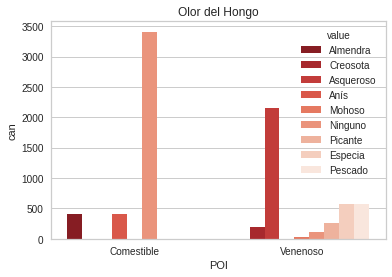

In [14]:
d = data3.loc[data3['var'] == 'ODOR']
d = d.replace({'value':['a','l','c','y','f','m','n','p','s'],'POI':['e','p']},
              {'value':['Almendra','Anís','Creosota','Pescado','Asqueroso','Mohoso','Ninguno','Picante','Especia'],'POI':['Comestible','Venenoso']})

plot = sns.barplot(x = 'POI', y = 'can', hue = 'value', data = d,palette='Reds_r').set(title='Olor del Hongo')

**Población (POP)**: los hongos venenosos se pueden encontrar normamente con otras especies de hongos, algo que en el caso de los hongos comestibles es más variables, ya que pueden ser solitarios o más dispersos.

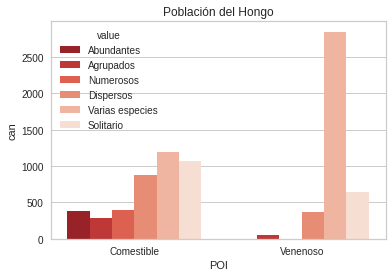

In [15]:
e = data3.loc[data3['var'] == 'POP']
e = e.replace({'value':['a','c','n','s','v','y'],'POI':['e','p']},
              {'value':['Abundantes','Agrupados','Numerosos','Dispersos','Varias especies','Solitario'],'POI':['Comestible','Venenoso']})

plot = sns.barplot(x = 'POI', y = 'can', hue = 'value', data = e,palette='Reds_r').set(title='Población del Hongo')

**Tipo de Anillo (RING_T)**: tanto los hongos comestibles como venenosos presentan anillos colgantes y evanecentes, pero en el caso de los comestibles es más frecuente que sean colgantes. En el caso de los venenosos los anillos grandes son una señal de su naturaleza que puede diferenciarlos muy bien de los comestibles.

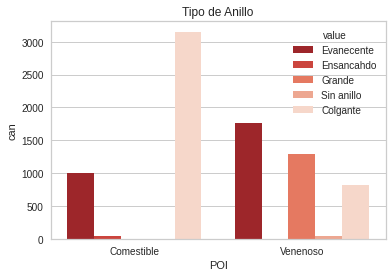

In [16]:
f = data3.loc[data3['var'] == 'RING_T']
f = f.replace({'value':['c','e','f','l','n','p','s','z'],'POI':['e','p']},
              {'value':['Telaraña','Evanecente','Ensancahdo','Grande','Sin anillo','Colgante','Con revestimiento','Zonal'],'POI':['Comestible','Venenoso']})

plot = sns.barplot(x = 'POI', y = 'can', hue = 'value', data = f,palette='Reds_r').set(title='Tipo de Anillo')

**Color Espora (SPORE)**: es claro que los colores café y negro en esporas es mucho más frecuente en hongos comestibles. En el caso de los hongos venenosos las esporas son más frecuentes en colores chocolate y blanco.

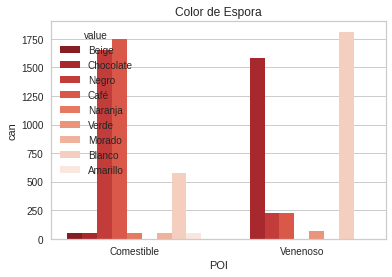

In [17]:
g = data3.loc[data3['var'] == 'SPORE']
g = g.replace({'value':['k','n','b','h','r','o','u','w','y'],'POI':['e','p']},
              {'value':['Negro','Café','Beige','Chocolate','Verde','Naranja','Morado','Blanco','Amarillo'],'POI':['Comestible','Venenoso']})

plot = sns.barplot(x = 'POI', y = 'can', hue = 'value', data = g,palette='Reds_r').set(title='Color de Espora')

**Color del tallo por arriba del anillo (S_COLOR_AB) y por debajo (S_COLOR_BE)**: los hongos con colores blanco y rosa son los más comunes tanto por debajo como por arriba del anillo. Pero en el caso de los comestibles la frecuencia de Blanco es más alta a comparación de los hongos venenosos. Al tener el mismo comportamiento, solo se dejará la variable S_COLOR_AB como parte del modelo.

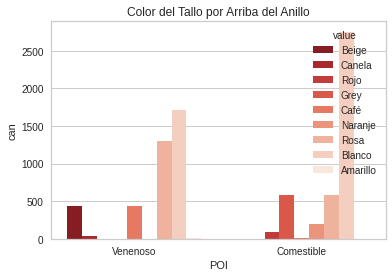

In [18]:
h = data3.loc[data3['var'] == 'S_COLOR_AB']
h = h.replace({'value':['n','b','c','g','o','p','e','w','y'],'POI':['e','p']},
              {'value':['Café','Beige','Canela','Grey','Naranje','Rosa','Rojo','Blanco','Amarillo'],'POI':['Comestible','Venenoso']})

plot = sns.barplot(x = 'POI', y = 'can', hue = 'value', data = h,palette='Reds_r').set(title='Color del Tallo por Arriba del Anillo')

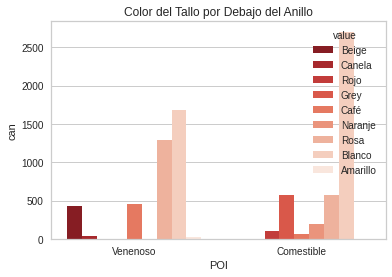

In [19]:
i = data3.loc[data3['var'] == 'S_COLOR_BE']
i = i.replace({'value':['n','b','c','g','o','p','e','w','y'],'POI':['e','p']},
              {'value':['Café','Beige','Canela','Grey','Naranje','Rosa','Rojo','Blanco','Amarillo'],'POI':['Comestible','Venenoso']})

plot = sns.barplot(x = 'POI', y = 'can', hue = 'value', data = i,palette='Reds_r').set(title='Color del Tallo por Debajo del Anillo')

**Textura por arriba (S_SURF_AB) y por debajo (S_SURF_BE) del anillo**: en ambos tipos de hongos, existe una frecuencia alta de texturas lisas, pero son más frecuentes en aquellos que no son tóxicos. Igualmente en los hongos venenosos pueden tener una mayor frecuencia de texturas sedosas. Al tener el mismo comportamiento, solo se dejará la variable S_SURF_AB como parte del modelo.

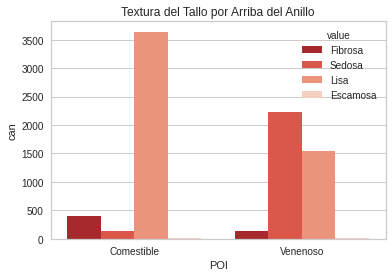

In [20]:
j = data3.loc[data3['var'] == 'S_SURF_AB']
j = j.replace({'value':['f','y','k','s'],'POI':['e','p']},
              {'value':['Fibrosa','Escamosa','Sedosa','Lisa'],'POI':['Comestible','Venenoso']})

plot = sns.barplot(x = 'POI', y = 'can', hue = 'value', data = j,palette='Reds_r').set(title='Textura del Tallo por Arriba del Anillo')

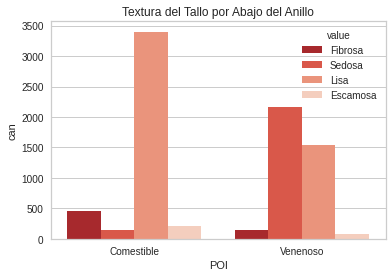

In [21]:
k = data3.loc[data3['var'] == 'S_SURF_BE']
k = k.replace({'value':['f','y','k','s'],'POI':['e','p']},
              {'value':['Fibrosa','Escamosa','Sedosa','Lisa'],'POI':['Comestible','Venenoso']})

plot = sns.barplot(x = 'POI', y = 'can', hue = 'value', data = k,palette='Reds_r').set(title='Textura del Tallo por Abajo del Anillo')

En el caso de las demás variables del modelo, no se encontraron comportamientos con respecto a la naturaleza de los hongos registrados en la base. Por lo tanto consideramos como parte del ejercicio de diseño del modelo final predictivo solamente tomar estas variables, pues al tener una mayor relación con la variable objetivo podrían representar de manera más acertada la predicción del modelo.

# 4. Proceso de Analítica

## 4.1 Pipeline Principal

In [22]:
cat_cols=['POI','BRUISES','G_COLOR','G_SIZE','ODOR','POP','RING_T','SPORE','S_COLOR_AB']

In [23]:
# Transformaciones para las variables categóricas

categorical_transformer = Pipeline(
                            steps=[
                                ("encoder", OneHotEncoder(handle_unknown="ignore",sparse_output=False))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

## 4.2 Preprocesamiento

Para el desarrollo de los modelos de clasificación, los datos deben ser transformas a Dummies, que basicamente se trata de despivotear los valores categóricos de las parametros del modelo y traducirlos de manera binaria. Adicional a esto se seleccionaron los paramteros que se consideraron de mayor relevancia para el modelo desde el análisis descriptivo de la base.

In [24]:
## Elección de variables categoricas relevantes

data4 = data2[cat_cols]
data4.head(6)

,POI,BRUISES,G_COLOR,G_SIZE,ODOR,POP,RING_T,SPORE,S_COLOR_AB
0,p,t,k,n,p,s,p,k,w
1,e,t,k,b,a,n,p,n,w
2,e,t,n,b,l,n,p,n,w
3,p,t,n,n,p,s,p,k,w
4,e,f,k,b,n,a,e,n,w
5,e,t,n,b,a,n,p,k,w


In [25]:
#Casteo de data a categorica.

data4[cat_cols]=data4[cat_cols].astype('category')

In [26]:
#Transformamos con el pipeline la data haciendo ONE HOT ENCODING
data4 = pd.get_dummies(data4)
data4.head(10)

,POI_e,POI_p,BRUISES_f,BRUISES_t,G_COLOR_b,G_COLOR_e,G_COLOR_g,G_COLOR_h,G_COLOR_k,G_COLOR_n,...,SPORE_y,S_COLOR_AB_b,S_COLOR_AB_c,S_COLOR_AB_e,S_COLOR_AB_g,S_COLOR_AB_n,S_COLOR_AB_o,S_COLOR_AB_p,S_COLOR_AB_w,S_COLOR_AB_y
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
## Para que quede una sola variable opjetivo se deja la variable POI_e, que representa los hongos comestibles.
data4 = data4.drop(['POI_p'],axis=1)

## Eliminación de categoria por variable

data4 = data4.drop(['BRUISES_f','G_COLOR_b','G_SIZE_b','ODOR_n','POP_s','RING_T_n','SPORE_h','S_COLOR_AB_c','G_SIZE_n','ODOR_f'],axis=1)
data4.head(6)

,POI_e,BRUISES_t,G_COLOR_e,G_COLOR_g,G_COLOR_h,G_COLOR_k,G_COLOR_n,G_COLOR_o,G_COLOR_p,G_COLOR_r,...,SPORE_w,SPORE_y,S_COLOR_AB_b,S_COLOR_AB_e,S_COLOR_AB_g,S_COLOR_AB_n,S_COLOR_AB_o,S_COLOR_AB_p,S_COLOR_AB_w,S_COLOR_AB_y
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Finalmente se establece la partición de las bases para su entrenamiento y prueba.

In [28]:
## Data de prueba y partición

X, y =  data4.drop(['POI_e'],axis=1), data4[['POI_e']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)

##Tamaño data de entrenamiento y prueba
a = len(X_train)
b = len(X_test)

## Tamaño registros de entrenamiento y prueba
{'Entrenamiento':a,'Prueba':b}

{'Entrenamiento': 5686, 'Prueba': 2438}

In [29]:
## Parametros del modelo
X.head(6)

,BRUISES_t,G_COLOR_e,G_COLOR_g,G_COLOR_h,G_COLOR_k,G_COLOR_n,G_COLOR_o,G_COLOR_p,G_COLOR_r,G_COLOR_u,...,SPORE_w,SPORE_y,S_COLOR_AB_b,S_COLOR_AB_e,S_COLOR_AB_g,S_COLOR_AB_n,S_COLOR_AB_o,S_COLOR_AB_p,S_COLOR_AB_w,S_COLOR_AB_y
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
## Variable objetivo
y.head(6)

,POI_e
0,0
1,1
2,1
3,0
4,1
5,1


## 4.3 Modelos

Para el desarrollo de los modelo seguimos una serie de pasos que permitieran escoger el mejor modelo:

1. Evaluamos la correlación de las variables dummie para estár seguros de que no exitan factores de correlación alta que afecten la capacidad predictiva del modelo a diseñar.
2. Implementar la libreria Pycaret para que, con base a una metrica de exactitud, sea posible identificar lo modelos ideales para ponerlos a prueba.
3. Probar desde sklearn los modelos encontrados para evaluar su comportamiento.

Al final de los dos primeros pasos hicimos pruebas para tres modelos en concreto:
- Análisis Discriminante
- Vecinos más Cercanos
- Arboles de Decisión

Para la evaluación de los modelos seleccionados para su análisis desde sklearn se utilizó la siguiente metodología:
1. El modelo se diseña por medio del entrenador correspondiente con la data de entrenamiento y se prueba los resultados con la data de prueba. Se aplican métricas de exactitud junto con la matríz de confución y curva ROC.

2. Se aplica validación cruzada para evaluar si el modelo está sobrestimando o no. Esta validación se aplica solamente a la data de entrenamiento para que la data de prueba sirva como evaluador del modelo generado desde la validación cruzada.

3. En el caso del modelo de Vecinos más Cercanos se diseñó un loop para validar el K más optimo de vecinos. Dicho loop se desarrolló tanto para la validación cruzada como sin ella. De esta manera se optimiza el valor K en ambos casos.

# 4.4 Métricas

El factor de selección de los modelos es la métrica de exactitud, de tal manera que los modelos con mejor capacidad de predicción seán los escogidos. Esto se desarrolla desde el momento en que se diseña el comparador de modelos de Pycaret pero aún utilizando esta herramiento, desidimos pasar a un proceso de análisis más puntual al evaluar tres modelos en concreto.

Los modelos se desarollaron desde la libreria Sklearn la cual sostiene todas las necesidades técnicas desde el proceso de desarrollo de machine learning y evaluación de modelos. Por otro lado para el ploteo de gráficas se desarrolló con MathPlotLib y Seaborn. Igualmente en las transformaciones de las bases y generación de dataframes se utilizó Pandas.

# 5. Metodología

## 5.1 Baseline

### Correlación Datos Dummies

Desde el desarrollo de Pycaret es posible identificar los modelos que más se pueden adaptar al proceso predictivo. Pero igualmente existe un ejercicio adicional para la definición del modelo. y es la identificación de correlaciones.

Aparte de la tarea de elegir las variables que se desarrollo previamente en el proceso descriptivo, estaría bien evaluar de las variables elegidas si existe alguna correlación. Por este motivo desarrollamos un análisis de correlación de Cramér-V.

In [31]:
## Importación de librerias

import scipy.stats as ss
import numpy as np

In [32]:
#Para evaluar la correlación entre las variables categóricas en un conjunto de datos, utilizaremos el coeficiente de correlación de Cramér-V.

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

In [33]:
## Creamos un nuevo dataframe con la misma estructura de la base con las variables ya dummies.

cat_columns = data4.columns
correlation_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)

In [34]:
## A partir del siguiente loop creamos un iterador de correlaciones que crearía la matriz de correlación de variables dummies.

for i in cat_columns:
    for j in cat_columns:
        if i == j:
            correlation_matrix.loc[i, j] = 1
        else:
            correlation_matrix.loc[i, j] = cramers_v(data4[i], data4[j])

threshold = 0.75

## Con esta función tomamos la matríz de correlaciones y evaluamos uno por uno los valores obtenidos de correlación. Aquellos que sean mayores a 0.75 son enlistados y aquellos que no se omiten.

def get_highly_correlated_columns(correlation_matrix, threshold):
    highly_correlated_columns = set()
    for i in correlation_matrix.columns:
        for j in correlation_matrix.columns:
            if i != j and correlation_matrix.loc[i, j] >= threshold:
                highly_correlated_columns.add(i)
                highly_correlated_columns.add(j)
    return highly_correlated_columns

highly_correlated_columns = get_highly_correlated_columns(correlation_matrix, threshold)

highly_correlated_columns

{'BRUISES_t', 'RING_T_p'}

Al ejecutar la función nos fijamos de que existen 2 variables con correlaciones mayores a 0.75, por lo tanto  es necesario filtrar una de las dos variables dummies especificas que puedan alterar la funcionalidad predictiva del modelo.

Por otro lado utilizamos la libreria ppscore para hacer el mísmo ejercicio de evaluación de correlaciones.

In [35]:
data4 = data4.drop(['RING_T_p'],axis=1)

In [36]:
df_Train=pd.concat([X_train, y_train],axis=1)
df_Test=pd.concat([X_test, y_test],axis=1)

In [37]:
pps_matrix = pps.matrix(df_Train)


In [38]:
TMP_D=pps_matrix.sort_values(by='ppscore',ascending=False)

In [39]:
TMP_D.head(50)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,BRUISES_t,BRUISES_t,1.000000,predict_itself,True,None,0.0000,1.000000,None
552,ODOR_a,ODOR_a,1.000000,predict_itself,True,None,0.0000,1.000000,None
920,POP_c,POP_c,1.000000,predict_itself,True,None,0.0000,1.000000,None
874,POP_a,POP_a,1.000000,predict_itself,True,None,0.0000,1.000000,None
828,ODOR_y,ODOR_y,1.000000,predict_itself,True,None,0.0000,1.000000,None
782,ODOR_s,ODOR_s,1.000000,predict_itself,True,None,0.0000,1.000000,None
736,ODOR_p,ODOR_p,1.000000,predict_itself,True,None,0.0000,1.000000,None
690,ODOR_m,ODOR_m,1.000000,predict_itself,True,None,0.0000,1.000000,None
644,ODOR_l,ODOR_l,1.000000,predict_itself,True,None,0.0000,1.000000,None
598,ODOR_c,ODOR_c,1.000000,predict_itself,True,None,0.0000,1.000000,None


Ya con la evaluación de correlaciones, pasamos al proceso de identificar los posibles modelos a escoger para la clasificación de datos. Para esto utilizaremos la librería pycaret y las diferentes funciones que permiten generar la matriz de modelos con respecto a una de las métricas de exactitud.

### Pycaret: Implementacion

La construcción del Pycaret puede servir como sustentación del proceso de Baseline. Es un parametro para al selección de variables y selección de modelos para la data objetivo. Pero de todas maneras como parte del ejercicio de práctica hicimos la selección de modelos y aplicación sobre sklearn para evaluar el comportamiento de tres modelos en específico.

El desarrollo del Pycaret se puede ver a continuación:

In [40]:
experimento_1 = setup(df_Train,test_data=df_Test,target = 'POI_e', session_id=123,fold=10,feature_selection=True)

,Description,Value
0,Session id,123
1,Target,POI_e
2,Target type,Binary
3,Original data shape,"(8124, 45)"
4,Transformed data shape,"(8124, 9)"
5,Transformed train set shape,"(5686, 9)"
6,Transformed test set shape,"(2438, 9)"
7,Numeric features,44
8,Preprocess,True
9,Imputation type,simple


In [41]:
best_model = compare_models(sort='AUC',exclude=['dummy','svm','ridge'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8991,0.9634,0.9394,0.8748,0.9058,0.7974,0.8000,0.1080
rf,Random Forest Classifier,0.8989,0.9634,0.9421,0.8726,0.9059,0.7970,0.8000,0.4550
et,Extra Trees Classifier,0.8991,0.9634,0.9394,0.8748,0.9058,0.7974,0.8000,0.4780
lightgbm,Light Gradient Boosting Machine,0.8991,0.9634,0.9394,0.8748,0.9058,0.7974,0.8000,0.1810
catboost,CatBoost Classifier,0.8991,0.9634,0.9394,0.8748,0.9058,0.7974,0.8000,2.2010
xgboost,Extreme Gradient Boosting,0.8991,0.9633,0.9394,0.8748,0.9058,0.7974,0.8000,0.4960
gbc,Gradient Boosting Classifier,0.8991,0.9613,0.9380,0.8756,0.9056,0.7974,0.7998,0.3650
knn,K Neighbors Classifier,0.8730,0.9391,0.8730,0.8810,0.8767,0.7458,0.7464,0.1540
qda,Quadratic Discriminant Analysis,0.8628,0.9098,0.8914,0.8504,0.8700,0.7249,0.7268,0.1430
ada,Ada Boost Classifier,0.8115,0.8838,0.8059,0.8264,0.8153,0.6228,0.6241,0.4600


Processing:   0%|          | 0/57 [00:00<?, ?it/s]

In [42]:
#Desicion Tree: El mejor modelo
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8875,0.9635,0.9490,0.8506,0.8971,0.7739,0.7795
1,0.8910,0.9499,0.9388,0.8625,0.8990,0.7812,0.7845
2,0.8946,0.9687,0.9252,0.8774,0.9007,0.7885,0.7897
3,0.9033,0.9667,0.9626,0.8654,0.9114,0.8057,0.8112
4,0.9033,0.9637,0.9286,0.8893,0.9085,0.8062,0.8070
5,0.8981,0.9624,0.9320,0.8782,0.9043,0.7955,0.7971
6,0.8996,0.9529,0.9320,0.8810,0.9058,0.7986,0.8001
7,0.9137,0.9704,0.9454,0.8935,0.9187,0.8270,0.8285
8,0.8961,0.9655,0.9522,0.8611,0.9044,0.7913,0.7961


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

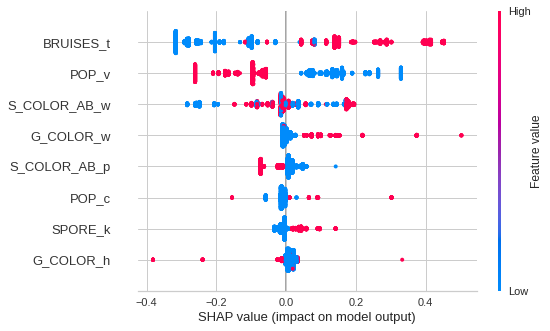

In [43]:
interpret_model(dt)

Podemos observar las variables que tienen un gran impacto para el modelo mediante los shap values,variables como BRUISES Y POP son determinantes, ya que al tener o no la propiedad generan excelente discriminacion entre las clases.

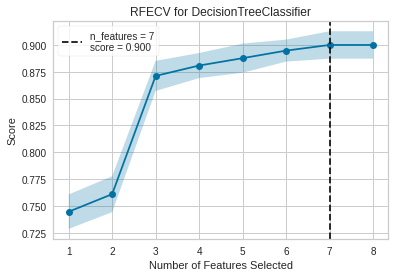

In [44]:
#Resultados del modelo de arbol de decision.
plot_model(dt,plot='rfe')

Para este modelo tenemos que con tan solo 7 caracteristicas se alcanza un score de 0.9, lo que nos da a entender que tenemos variables que generan alta discriminacion entre una clase o otra.

## 5.2 Validación


A partir de aquí vamos a ver el proceso de desarrollo de los tres modelos desde su aplicación en sklearn. Primero hicimos la partición de la data. Para dicho entrenamiento tomamos una relación (70-30) para la partición de los datos.

In [45]:
## Data de prueba y partición
X, y =  data4.drop(['POI_e'],axis=1), data4[['POI_e']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)

##Tamaño data de entrenamiento y prueba
a = len(X_train)
b = len(X_test)

{'Entrenamiento':a,'Prueba':b}

{'Entrenamiento': 5686, 'Prueba': 2438}

## 5.3 y 5.4 Iteraciones y Evalución - Herramientas

Desde aquí vamos a ver los resultados de los tres modelos evaluados.

### Vecinos más cercanos

Para este modelo aplicamos en primer lugar un iterador que nos permitiera evaluar el K más ideal para este modelo basandonos en la metra de exactitud (Accuracy) desde la data de entrenamiento. Dicha validación se desarrollo desde validación cruzada para poder controlar posibles sobreajustes en el modelo. Se evaluará el modelo desde k=1 hasta k=100.

In [46]:
## Almacenador
table = pd.DataFrame({'K':[0],
                     'Acuracy':[0]})

## Entrenamiento
for i in range(1,100):
    clf = neighbors.KNeighborsClassifier(i)
    cv_score = cross_val_score(clf, X_train, y_train, cv = 10)
    Acu = cv_score.mean()
    K = i
    table.loc[i] = [K,Acu]

table = table.drop(labels=[0],axis=0)
table

warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

¿Cuáles K tienen mejor exactitud?

In [47]:
## K con mayor accuracy

Acu_Max = table.Acuracy.max()
print(table[table.Acuracy == Acu_Max])

     K  Acuracy
4  4.0   0.9949
5  5.0   0.9949


Al revisar la exactitud de todos los K evaluados es posible ver que incluso hasta los 100 vecinos más cercanos, la exactitud tiende a ser muy alta.

[Text(0.5, 1.0, 'Acuracy por K para Data de Entrenamiento por Validación Cruzada')]

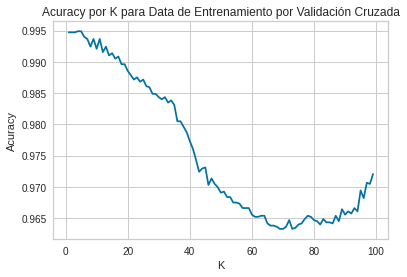

In [48]:
## Plot Accuracy para Entrenamiento
PAEVC = sns.lineplot(data = table, x = 'K', y = 'Acuracy').set(title='Acuracy por K para Data de Entrenamiento por Validación Cruzada')
PAEVC

Este sería el resultado del modelo probado con la data de prueba con K=3 utilizando el predictor con validación cruzada.

In [49]:
clf = neighbors.KNeighborsClassifier(3)
clf.fit(X_train,y_train)

## Predicción de modelo por validación cruzada
y_pred = cross_val_predict(clf, X_test, y_test, cv=10)

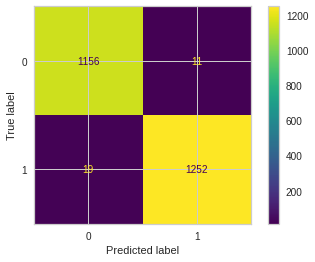

In [50]:
## Matriz de Confusión
matriz = confusion_matrix(y_test,y_pred)
fig = ConfusionMatrixDisplay(matriz)
fig.plot()

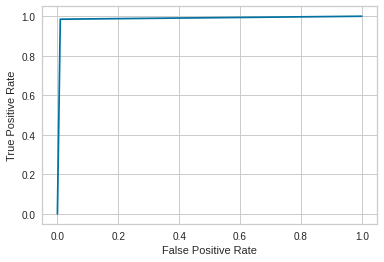

In [51]:
## Curva ROC

fpr, tpr, _ = roc_curve(y_test,y_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [52]:
## Métricas de Exactitud

acu = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
sen = recall_score(y_test,y_pred)

KVTable = pd.DataFrame([{'Modelo':'KNN','Exactitud':acu,'Precisión':pre,'Sensibilidad':sen}])
KVTable

,Modelo,Exactitud,Precisión,Sensibilidad
0,KNN,0.987695,0.991291,0.985051


Las métricas de exactitud dan valores muy altos que dan seguridad sobre la capacidad del modelo de predecir la naturaleza de los hongos que se encuentran en la base de prueba.

### Análisis de Discriminante

Entrenamoes el modelo y pasamos a realizar al predicción de los datos de prueba.

In [53]:
## Entrenamiento
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)

## Predicción de modelo por validación cruzada
y_pred = cross_val_predict(clf, X_test, y_test, cv=10)

De esta manera obtenemos los resultados del modelo.

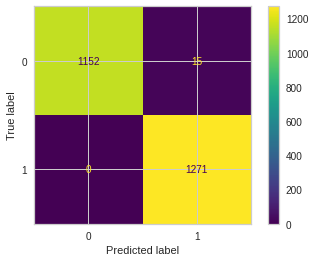

In [54]:
matriz = confusion_matrix(y_test,y_pred)
fig = ConfusionMatrixDisplay(matriz)
fig.plot()

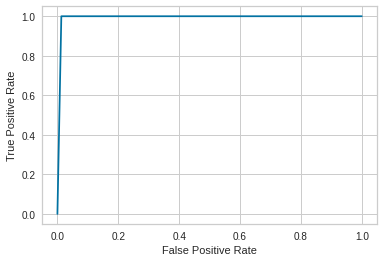

In [55]:
## Curva ROC

fpr, tpr, _ = roc_curve(y_test,y_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [56]:
## Métricas de Exactitud

acu = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
sen = recall_score(y_test,y_pred)

DisTable = pd.DataFrame([{'Modelo':'Discriminante','Exactitud':acu,'Precisión':pre,'Sensibilidad':sen}])
DisTable

,Modelo,Exactitud,Precisión,Sensibilidad
0,Discriminante,0.993847,0.988336,1.0


Este modelo tambien tiene resultados muy buenos por lo que puede ser tenído en cuenta para la elección definitiva del modelo.

### Arboles de Decisión

Entrenamos el modelo.

In [57]:
## Entrenamiento
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train,y_train)

## Aplicación al modelo entrenado a la data de prueba
y_pred = cross_val_predict(clf, X_test, y_test, cv=10)

Obtenemos medidas de exactitud.

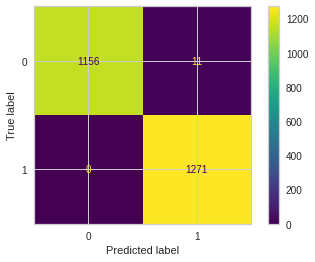

In [58]:
matriz = confusion_matrix(y_test,y_pred)
fig = ConfusionMatrixDisplay(matriz)
fig.plot()

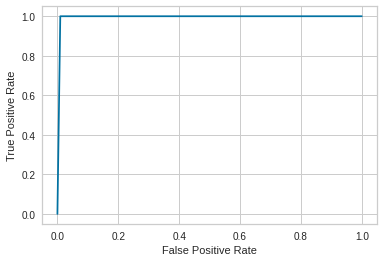

In [59]:
## Curva ROC
fpr, tpr, _ = roc_curve(y_test,y_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [60]:
## Métricas de Exactitud

acu = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
sen = recall_score(y_test,y_pred)

ArbTable = pd.DataFrame([{'Modelo':'Arboles','Exactitud':acu,'Precisión':pre,'Sensibilidad':sen}])
ArbTable

,Modelo,Exactitud,Precisión,Sensibilidad
0,Arboles,0.995488,0.99142,1.0


# 6. Resultados

## 6.1 Métricas

A continuación el resumen de resultados de los modelos evaluados:

In [61]:
pd.concat([KVTable,DisTable,ArbTable])

,Modelo,Exactitud,Precisión,Sensibilidad
0,KNN,0.987695,0.991291,0.985051
0,Discriminante,0.993847,0.988336,1.000000
0,Arboles,0.995488,0.991420,1.000000


El critério de elegibilidad del modelo se centra en la exactitud del mísmo para predecir la naturaleza de los hongos. Con respecto al Accuracy, los tres modelos tienen buenos resultados, siendo el más alto el del modelo de Arboles de Decisión. Facilmente los tres pueden ser elegibles. Desde el punto de vista de los desarrolladores de este proyecto consideramos que puede existir una erramiento de triple valoración en donde los tres modelos indiquen resultados de la naturaleza del hongo y que dependiendo de la dichos resultados, el experto tome una decisión.

## 6.2 Evaluación Cualitativa

El modelo no presenta datos de sobreajuste o subajuste. Desde el proceso de entrenamiento y de predicción se utilizo validación cruzada lo que permite generar datos más axactos para el modelo. Igualmente las curvas ROC de los tres modelos muestran la efectividad de cada uno en el proceso de predecicción tanto para un hongo que es comestible o tóxico.

## 6.3 Consideraciones de producción.

En cuanto a la alimentación del modelo, se espera que las variables predictoras sean representadas por una base de datos con la mísma estructura de la base original de este modelo. Como ejemplo de dicha necesidad y como parte de la comprobación de la efectividad del modelo, ponemos a prueba una base con el registro de 3 hongos con diversidad de naturaleza. Uno de estos hongos se considera nocivo al ser consumido en grandes cantidades.

Hongo venenoso y comestible.
- Tricholoma equestre: es un hongo tóxico si es consumido en grandes cantidades, aún así es consumido en Europa.

Hongo venenoso.
- Amanita bisporigera: Hongo color beige que al ser ingerido afecta al higado y el sistema renal.

Hongo comestible.
- Pleurotus ostreatus: tambien es conocido como orellana y junto con los champiñones y portobellos son usados en diferentes resetas culinarias.

El siguiente es el código que se podrá utilizar para predecir la naturaleza de los hongos en los tres modelos seleccionados.

In [62]:
## 1. Base con los hongos a predecir.
New = pd.DataFrame({'Name':['Tricholoma equestre','Boletus pulcherrimus','Pleurotus ostreatus'],
              'POI':['?','p','e'],
                     'BRUISES':['t','f','f'],
                     'G_COLOR':['y','b','w'],
                     'G_SIZE':['b','b','b'],
                     'ODOR':['a','f','n'],
                     'POP':['v','v','c'],
                     'RING_T':['n','l','n'],
                     'SPORE':['w','w','w'],
                     'S_COLOR_AB':['y','b','w']})

## Generación de Dummies
New_Dummie = New.drop(['Name','POI'],axis=1)
New_Dummie = pd.get_dummies(New_Dummie)
New_Dummie

## Estructura Dummie Estandar
Est_Base = pd.DataFrame({'BRUISES_t':[0],'BRUISES_f':[0],
                         'G_COLOR_e':[0],'G_COLOR_g':[0],'G_COLOR_h':[0],'G_COLOR_k':[0],'G_COLOR_n':[0],'G_COLOR_o':[0],'G_COLOR_p':[0],'G_COLOR_r':[0],'G_COLOR_u':[0],'G_COLOR_w':[0],'G_COLOR_y':[0],'G_COLOR_b':[0],
                         'G_SIZE_n':[0],'G_SIZE_b':[0],
                         'ODOR_a':[0],'ODOR_c':[0],'ODOR_f':[0],'ODOR_l':[0],'ODOR_m':[0],'ODOR_p':[0],'ODOR_s':[0],'ODOR_y':[0],'ODOR_n':[0],
                         'POP_a':[0],'POP_c':[0],'POP_n':[0],'POP_v':[0],'POP_y':[0],'POP_s':[0],
                         'RING_T_e':[0],'RING_T_f':[0],'RING_T_l':[0],'RING_T_n':[0],'RING_T_p':[0],
                         'SPORE_b':[0],'SPORE_k':[0],'SPORE_n':[0],'SPORE_o':[0],'SPORE_r':[0],'SPORE_u':[0],'SPORE_w':[0],'SPORE_y':[0],'SPORE_h':[0],
                         'S_COLOR_AB_b':[0],'S_COLOR_AB_e':[0],'S_COLOR_AB_g':[0],'S_COLOR_AB_n':[0],'S_COLOR_AB_o':[0],'S_COLOR_AB_p':[0],'S_COLOR_AB_w':[0],'S_COLOR_AB_y':[0],'S_COLOR_AB_c':[0]})

## Estandarización de tabla dummies
New_Dummie = pd.concat([Est_Base, New_Dummie], sort=False)
New_Dummie = New_Dummie.reset_index()
New_Dummie = New_Dummie.fillna(0)
New_Dummie = New_Dummie.drop(['ODOR_f','G_SIZE_n','BRUISES_f','G_COLOR_b','G_SIZE_b','ODOR_n','POP_s','RING_T_n','RING_T_p','SPORE_h','S_COLOR_AB_c'],axis=1)
New_Dummie = New_Dummie.drop([0],axis=0)

## Entrenamiento y cálculo de medidas
table = pd.DataFrame({'A':['nn'],
                     'KNN_Pred':[0],
                     'DIS_Pred':[0],
                     'ARB_Pred':[0]})

for i in range(0,New_Dummie.index.max()):
    data_test = New_Dummie.loc[New_Dummie['index']==i]
    data_test = data_test.drop(['index'],axis=1)

    A = New.iloc[i,0]
    
    KNN = neighbors.KNeighborsClassifier(3)
    KNN.fit(X_train,y_train)
    PRED_KNN = KNN.predict(data_test)
    PRED_KNN = PRED_KNN.tolist()[0]

    DIS = LinearDiscriminantAnalysis()
    DIS.fit(X_train,y_train)
    PRED_DIS = DIS.predict(data_test)
    PRED_DIS = PRED_DIS.tolist()[0]

    ARB = DecisionTreeClassifier(random_state=123)
    ARB.fit(X_train,y_train)
    PRED_ARB = ARB.predict(data_test)
    PRED_ARB = PRED_ARB.tolist()[0]

    table.loc[i] = [A,PRED_KNN,PRED_DIS,PRED_ARB]

table.replace({1:'Comestible', 0:'Venenoso'})

,A,KNN_Pred,DIS_Pred,ARB_Pred
0,Tricholoma equestre,Comestible,Venenoso,Comestible
1,Boletus pulcherrimus,Venenoso,Venenoso,Venenoso
2,Pleurotus ostreatus,Comestible,Comestible,Comestible


Los resultados demuestran hasta que punto los tres modelos pueden predecir la anturaleza de un hongo con respecto a su anatomía. Para la Boletus Pulcherrimus los tres modelos detectaron que era un hongo venenoso. Para el caso de la Pleurotus Ostreatus detecto que pertenece al grupo de hongos que pueden ser consumidos sin sufrir ningún daño al organismo.

El caso más llamativo es del Tricholoma Equestre, el cual es un hongo que es consumido en Europa pero se caracteriza por ser tóxico si se consume en grandes cantidades. Dos de los tres modelos lo catalogaron como comestible, pero de todas formas el segundo lo consideró nocivo.

La alimentación del modelo igualmente permitiría que se pudiera reforzar en el proceso de entrenamiento. Es necesario para eso modelar el código que permita alimentarlo a medida que aparecen nuevos registros.

# 7. Conclusiones

- Se desarrollaron y seleccionaron modelos de clasificación de hongos siguiendo un proceso que incluyó la evaluación de la correlación de variables dummies, la implementación de la librería PyCaret para identificar modelos ideales basándose en exactitud y la realización de pruebas con scikit-learn. Los tres modelos seleccionados, Análisis Discriminante, Vecinos más Cercanos (KNN) y Árboles de Decisión, fueron evaluados mediante la matriz de confusión, curva ROC y validación cruzada, optimizando el valor K en el caso de KNN.

- Los modelos demostraron ser precisos al predecir la naturaleza de los hongos, basándose en su anatomía, al probarse con tres hongos de diversa naturaleza. La exactitud, precisión y sensibilidad de los modelos fueron altas, siendo el modelo de Árboles de Decisión el más exacto. Por lo tanto, los tres modelos pueden ser elegibles para la predicción de la naturaleza de los hongos.

- Durante el proceso de desarrollo del modelo de ML, fue crucial analizar y seleccionar las variables relevantes para evitar correlaciones altas que puedan generar ruido en el modelo. Para abordar esta preocupación, se llevaron a cabo análisis descriptivos y se crearon visualizaciones gráficas para comprender mejor el comportamiento de la variable objetivo 'POI' (comestible o venenoso) en relación con las demás variables anatómicas, así como las correlaciones entre ellas. Este análisis permitió seleccionar las variables apropiadas para el entrenamiento del modelo.